In [8]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [9]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [10]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [11]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [12]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)

# reflect the tables

Base.classes.keys()


['measurement', 'station']

In [13]:
# View all of the classes that automap found

print(Base.classes.keys())

['measurement', 'station']


In [14]:
# Save references to each table

Measurement = Base.classes.measurement
Station = Base.classes.station

In [15]:
# Create our session (link) from Python to the DB
session = Session(engine)



# Exploratory Precipitation Analysis

In [16]:
# Find the most recent date in the data set.

most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
print(most_recent_date)

2017-08-23


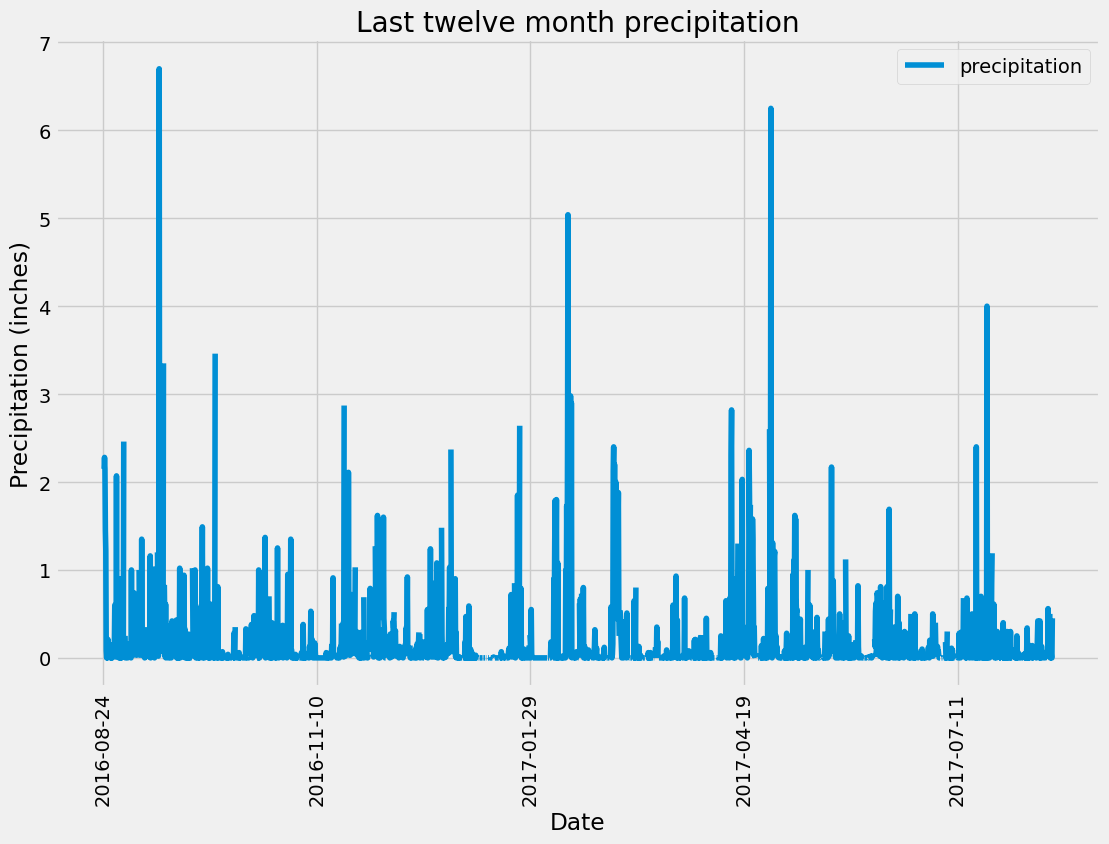

In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

last_twelve_month = dt.datetime.strptime(most_recent_date, "%Y-%m-%d") - dt.timedelta(days=365)

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores
precipitation_results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_twelve_month).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(precipitation_results, columns=['date','precipitation']).set_index('date')

# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data

precipitation_df.plot(rot=90, figsize=(12,8))
plt.title('Last twelve month precipitation')
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.show()




In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summary_stats = precipitation_df['precipitation'].describe()
print(summary_stats)

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: precipitation, dtype: float64


# Exploratory Station Analysis

In [19]:
# Design a query to calculate the total number stations in the dataset
stations = session.query(Measurement.station).distinct().all()
stations_total = len(stations)
print(stations_total)

9


In [20]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_counts = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

for station, count in station_counts:
    print(f"Station {station} has {count} measurements.")

Station USC00519281 has 2772 measurements.
Station USC00519397 has 2724 measurements.
Station USC00513117 has 2709 measurements.
Station USC00519523 has 2669 measurements.
Station USC00516128 has 2612 measurements.
Station USC00514830 has 2202 measurements.
Station USC00511918 has 1979 measurements.
Station USC00517948 has 1372 measurements.
Station USC00518838 has 511 measurements.


In [21]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temps = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

# Print the results to the console
for low, high, avg in temps:
    print(f"The lowest temperature recorded at the most active station is {low} degrees Fahrenheit.")
    print(f"The highest temperature recorded at the most active station is {high} degrees Fahrenheit.")
    print(f"The average temperature recorded at the most active station is {avg} degrees Fahrenheit.")

The lowest temperature recorded at the most active station is 54.0 degrees Fahrenheit.
The highest temperature recorded at the most active station is 85.0 degrees Fahrenheit.
The average temperature recorded at the most active station is 71.66378066378067 degrees Fahrenheit.


In [22]:
last_twelve_month

datetime.datetime(2016, 8, 23, 0, 0)

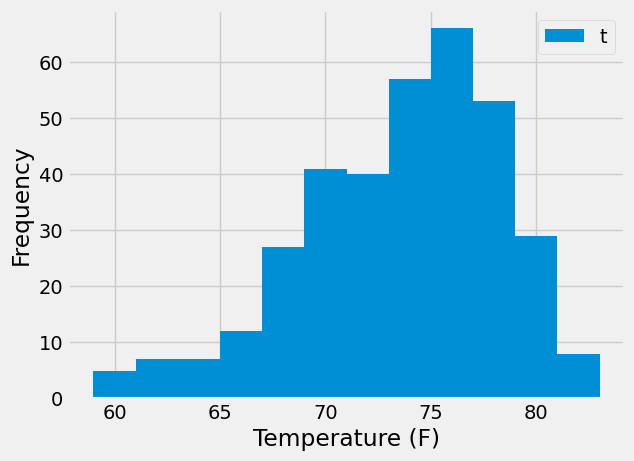

In [23]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temps = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(Measurement.date >= '2016-08-23' ).all()

# Convert the query results to a list
temps_list = [temp[0] for temp in temps]

# Plot the temperature observation data as a histogram using Matplotlib
plt.hist(temps_list, bins=12)
plt.xlabel('Temperature (F)')
plt.legend('tobs')
plt.ylabel('Frequency')
plt.tight_layout
plt.show()

# Close session

In [24]:
# Close Session
session.close()